# Lagrange Interpolation

In [1]:
### Imports and Auxiliary Functions
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jn as bessel

In [17]:
### Getting Data
datapoints, j_0, j_1 = np.loadtxt('data-bessel.txt', dtype=float, skiprows=1, unpack=True)
j_0prime = -1 * j_1

In [3]:
### Main Function
def Lagrange(points, func_values, x): # Defines a Lagrange polynomial over the points given.
                                      # Evaluates it at x.
    l = np.zeros_like(points)
    for i in range(len(l)):
        prod = 1
        for j in range(np.shape(points)[0]):
            if(j != i):
                prod *= (x - points[j]) / (points[i] - points[j])
        l[i] = prod
    return(np.dot(l, func_values))    

In [4]:
### Evaluation
points = np.arange(0, 10, 0.25)
linearEstimates = np.zeros_like(points)
quadraticEstimates = np.zeros_like(points)
cubicEstimates = np.zeros_like(points)
count = 0
for point in points:
    linearEstimates[count] = Lagrange(datapoints[5:7], j_1[5:7], point)
    quadraticEstimates[count] = Lagrange(datapoints[5:8], j_1[5:8], point)
    cubicEstimates[count] = Lagrange(datapoints[4:8], j_1[4:8], point)
    count += 1

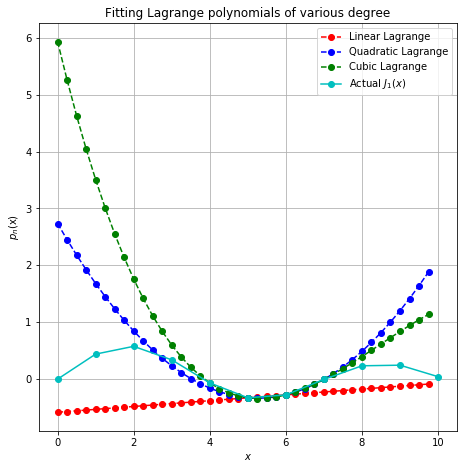

In [5]:
### Plotting
fig = plt.figure()
fig.set_size_inches(7.5, 7.5)
plt.plot(points, linearEstimates, 'ro--', label='Linear Lagrange')
plt.plot(points, quadraticEstimates, 'bo--', label='Quadratic Lagrange')
plt.plot(points, cubicEstimates, 'go--', label='Cubic Lagrange')
plt.plot(datapoints, j_1, 'co-', label='Actual $J_1(x)$')
plt.xlabel('$x$')
plt.ylabel('$p_n$(x)')
plt.grid()
plt.title('Fitting Lagrange polynomials of various degree')
plt.legend()

---

# Hermite Interpolation

In [6]:
### Main Function
    
def Hermite(points, func_values, func_derivatives, x): # Defines a Hermite Polynomial
                                                       # over points given, and evaluates
                                                       # it at x.
    multipliers = np.zeros(4)
    multipliers[0] = ( ( 1 - 2 * (x - points[0]) ) * ( ( x - points[1] ) ** 2 ) ) / ( points[0] - points[1])**2
    multipliers[1] = ( ( 1 - 2 * (x - points[1]) ) * ( ( x - points[0] ) ** 2 ) ) / ( points[0] - points[1])**2
    multipliers[2] = ( ( x - points[0] ) * ( ( x - points[1] ) ** 2 ) ) / ( ( points[0] - points[1] ) ** 2 )
    multipliers[3] = ( ( x - points[1] ) * ( ( x - points[0] ) ** 2 ) ) / ( ( points[0] - points[1] ) ** 2 )
    value = np.dot(multipliers[0:2], func_values) + np.dot(multipliers[2:4], func_derivatives)
    return(value)

In [18]:
### Evaluation
test_points = np.arange(4.0, 7.0, 0.1)
count = 0
HermiteEstimates = np.zeros_like(test_points)
for point in test_points:
    HermiteEstimates[count] = Hermite(datapoints[5:7], j_0[5:7], j_0prime[5:7], point)
    count += 1

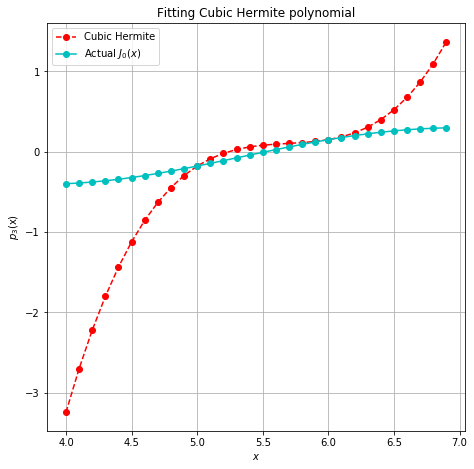

In [19]:
### Plotting
fig = plt.figure()
fig.set_size_inches(7.5, 7.5)
plt.plot(test_points, HermiteEstimates, 'ro--', label='Cubic Hermite')
plt.plot(test_points, bessel(0, test_points), 'co-', label='Actual $J_0(x)$')
plt.xlabel('$x$')
plt.ylabel('$p_3$(x)')
plt.grid()
plt.title('Fitting Cubic Hermite polynomial')
plt.legend()

In [9]:
linearEstimates[points==5.5]

array([-0.3021315])

In [10]:
quadraticEstimates[points==5.5]

array([-0.32976972])

In [11]:
cubicEstimates[points==5.5]

array([-0.33547755])

In [12]:
bessel(1, 5.5)

-0.34143821542904335

In [13]:
bessel(0, 5.5)

-0.00684386941781919